# HW7 - Keras for MNIST
##### 負責助教：王培霖 barry84090371@gmail.com

## Data - Modified National Institute of Standards and Technology(MNIST) database 
* Number of Instances: 60000
* Number of Attributes: 28 * 28 numbers, which is bounded by [0,255] 

## 評分標準
### 原始分數
* 上課繳交：20%
    * 在當天 16:20 前上傳至 new E3 作業，請將以下打包成 .zip 上傳：
        * 程式原始檔 (.ipynb）
        * 程式 .html 檔
    * 並填寫表單上傳程式執行結果
        * 請上傳 .html 檔案至表單
        * __請統一檔名 <學號>-<姓名>.html__
        * [表單連結](https://docs.google.com/forms/d/e/1FAIpQLSdlbNU_u9kb1QpCdXsgX42gx6UcRYCtVnX4E0xVlkjYyEOgug/viewform)
* 程式分數：80%

### 調整分數
* 你的調整分數 = (你的原始分數 - 全部人原始分數平均) x (15. / 全部人原始分數標準差) + 80.

* 學號 : 0616018
* 姓名 : 林哲宇

## Packages that Might Be Used

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, Flatten, MaxPooling2D, Activation
from keras.optimizers import RMSprop
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
from matplotlib.pyplot import imshow
import numpy as np
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8762990625374429735
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17448447742612091859
physical_device_desc: "device: XLA_CPU device"
]


## Data Preprocessing - 30%

#### 助教幫你們吃進來，並且印出第十張 ------- 0%

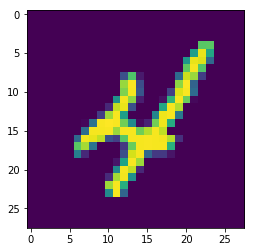

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

imshow(X_train[9])

#### 1.使用shape函式印出x_train及x_test的大小 -------- 10%

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### 2.使用reshape函式將x_train及x_test變為答案表示的樣子 -------- 10%

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


#### 3.使用keras內建的onehot encoding將y_train及y_test變為binary的形式 -------- 10%    

In [5]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)

In [6]:
print(y_train_onehot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


![123](https://img-blog.csdn.net/20181020204437937?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L21veXUxMjM0NTY3ODk=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)
## Building NN - 30%

#### 1. 建立一個類神經網路，其中：
    (1)input為784元

    (2)中間有兩層hidden layer，neuron數量都為20

    (3)最後一層output為10元，active function請使用softmax

    (4)最後使用summary函式來確認建好的NN模型
    
    p.s. 如果直接用LeakyReLU當參數丟進去時，會多兩層LeakyReLU是正常現象~

Hint:

[keras nn使用方法](https://keras.io/zh/getting-started/sequential-model-guide/)

[keras激活函數](https://keras.io/zh/activations/#_3)

In [7]:
model = Sequential([
    Dense(20, input_shape=(784,)),
    Activation('relu'),
    Dense(20, input_shape=(21,)),
    Activation('relu'),
    Dense(10, input_shape=(21,)),
    Activation('softmax')
])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0


#### 2. 建好神經網路後，我們便要訓練我們的模型
    (1)請先compile你的模型，使其變為可訓練，其中loss設為categorical_crossentropy，optimizer設為RMSprop()，metrics設為accuracy

    (2)接著請fit你的模型，其中batch_size設為128，epochs數量先設為10，verbose設為1，validation_split設為0.2

Hint:

[Compile 和 fit 使用方法及參數調整](https://keras.io/zh/models/sequential/)

In [8]:
#Compile part
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
#fit part
model.fit(x=X_train, y=y_train_onehot, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 19us/step - loss: 8.9762 - acc: 0.4337 - val_loss: 6.2495 - val_acc: 0.5878
Epoch 2/10
48000/48000 [==============================] - 1s 18us/step - loss: 3.4297 - acc: 0.7636 - val_loss: 1.7643 - val_acc: 0.8707
Epoch 3/10
48000/48000 [==============================] - 1s 18us/step - loss: 1.7596 - acc: 0.8745 - val_loss: 1.4407 - val_acc: 0.8976
Epoch 4/10
48000/48000 [==============================] - 1s 17us/step - loss: 1.4554 - acc: 0.8968 - val_loss: 1.4473 - val_acc: 0.8961
Epoch 5/10
48000/48000 [==============================] - 1s 17us/step - loss: 1.2870 - acc: 0.9085 - val_loss: 1.0868 - val_acc: 0.9229
Epoch 6/10
48000/48000 [==============================] - 1s 17us/step - loss: 1.1844 - acc: 0.9165 - val_loss: 1.1048 - val_acc: 0.9208
Epoch 7/10
48000/48000 [==============================] - 1s 17us/step - loss: 1

#### 3. 建好的模型在test data的表現

In [9]:
scores = model.evaluate(X_test, y_test_onehot)
print('acc:',scores[1])

10000/10000 [==============================] - 0s 19us/step
acc: 0.9334


## Building CNN - 30%

#### 1. 建立一個類神經網路，其中：
    (1)input為(60000,28,28,1)，所以各位要先把資料reshape成需要的格式

    (2)中間的層數請看範例，一層一層疊上去

    (3)其中卷積層filter=16, kernel_size=(3,3), padding='same', input_shape(28,28,1), actication幫我設relu

    (4)Maxpooling size 為 (2,2)
    
    (5)dropout 0.25
    
    (6)做完卷積層要記得flatten，走NN，其中neuron數量為128，activation幫我設relu
    
    (7)dropout 0.5
    
    (8)output layer一樣單元數為10，activation function幫我設softmax

Hint:

[MaxPooling2D](https://keras.io/zh/layers/pooling/)

[Conv2D](https://keras.io/zh/layers/convolutional/)

In [10]:
x_train = X_train.reshape(60000,28,28,1)
x_test = X_test.reshape(10000,28,28,1)

model = Sequential()  

# Create CN layer 1  
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(28,28,1), activation='relu'))

# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size = (2, 2)))
  
# Add Dropout layer  
model.add(Dropout(rate=0.25))

#Add Flatten Layer
model.add(Flatten())

#Add NN Layer
model.add(Dense(128))
model.add(Activation('relu'))

# Add Dropout layer  
model.add(Dropout(rate=0.5))

#Add Output Layer 
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()  

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               401536    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
___________________________

#### 2. 建好神經網路後，我們便要訓練我們的模型
    (1)請先compile你的模型，使其變為可訓練，其中loss設為categorical_crossentropy，optimizer設為adam，metrics設為accuracy

    (2)接著請fit你的模型，其中batch_size設為128，epochs數量先設為10，verbose設為1，validation_split設為0.2

Hint:

[Compile 和 fit 使用方法及參數調整](https://keras.io/zh/models/sequential/)

In [11]:
#Compile part
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#fit part
model.fit(x=x_train, y=y_train_onehot, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 329us/step - loss: 6.2746 - acc: 0.5923 - val_loss: 1.1469 - val_acc: 0.9131
Epoch 2/10
48000/48000 [==============================] - 16s 325us/step - loss: 1.1375 - acc: 0.8592 - val_loss: 0.2488 - val_acc: 0.9452
Epoch 3/10
48000/48000 [==============================] - 15s 315us/step - loss: 0.4432 - acc: 0.8895 - val_loss: 0.1702 - val_acc: 0.9567
Epoch 4/10
48000/48000 [==============================] - 15s 313us/step - loss: 0.3182 - acc: 0.9151 - val_loss: 0.1263 - val_acc: 0.9674
Epoch 5/10
48000/48000 [==============================] - 15s 308us/step - loss: 0.2533 - acc: 0.9285 - val_loss: 0.1134 - val_acc: 0.9716
Epoch 6/10
48000/48000 [==============================] - 15s 311us/step - loss: 0.2160 - acc: 0.9377 - val_loss: 0.0931 - val_acc: 0.9744
Epoch 7/10
48000/48000 [==============================] - 15s 312us/step - loss: 0.1850 - acc: 0.9462 - val_loss: 0.

#### 3. 建好的模型在test data的表現

In [12]:
scores = model.evaluate(x_test, y_test_onehot)
print('acc:',scores[1])

10000/10000 [==============================] - 1s 125us/step
acc: 0.9791


# Result
助教幫你們把Confusion matrix印出來

In [13]:
prediction = model.predict_classes(x_test)
import pandas as pd  
print("\t[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])) 

	[Info] Display Confusion Matrix:
predict    0     1     2    3    4    5    6     7    8    9
label                                                       
0        971     0     1    0    0    0    3     2    3    0
1          0  1120     5    1    0    1    2     1    5    0
2          1     1  1018    3    0    0    1     7    1    0
3          1     0     3  998    0    3    0     4    1    0
4          1     0     2    0  958    0    4     0    2   15
5          2     0     0    7    0  874    5     1    2    1
6          7     2     1    0    6    4  936     0    2    0
7          1     3    12    1    2    0    0  1006    1    2
8          3     0     3    4    2    6    4     9  937    6
9          6     5     1    8    4    0    0    10    2  973



# BONUS - 10%
## test data acc達到99.5以上，助教給你加分分
## 恭喜各位寫完全部的作業，但別忘記還有期末專題歐~

![一個人](https://i.imgur.com/yrZnaCR.gif)
# 上課心得or給助教的話XD
* ans